<a href="https://colab.research.google.com/github/sudhanshukhare18/logistic-regression-colab/blob/main/minevsrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
sonar_data= pd.read_csv('/content/Copy of sonar data.csv',header=None)

In [16]:
sonar_data.head()


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [17]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [18]:
sonar_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


ValueError: x and y must be the same size

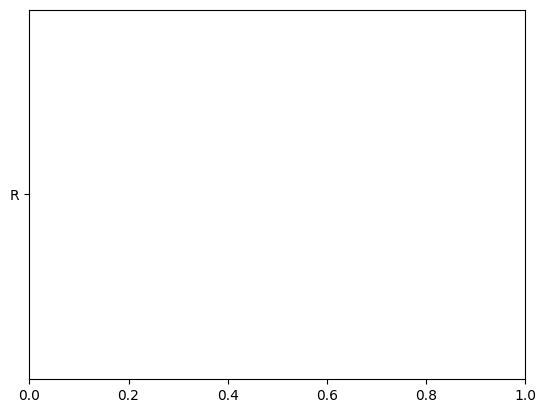

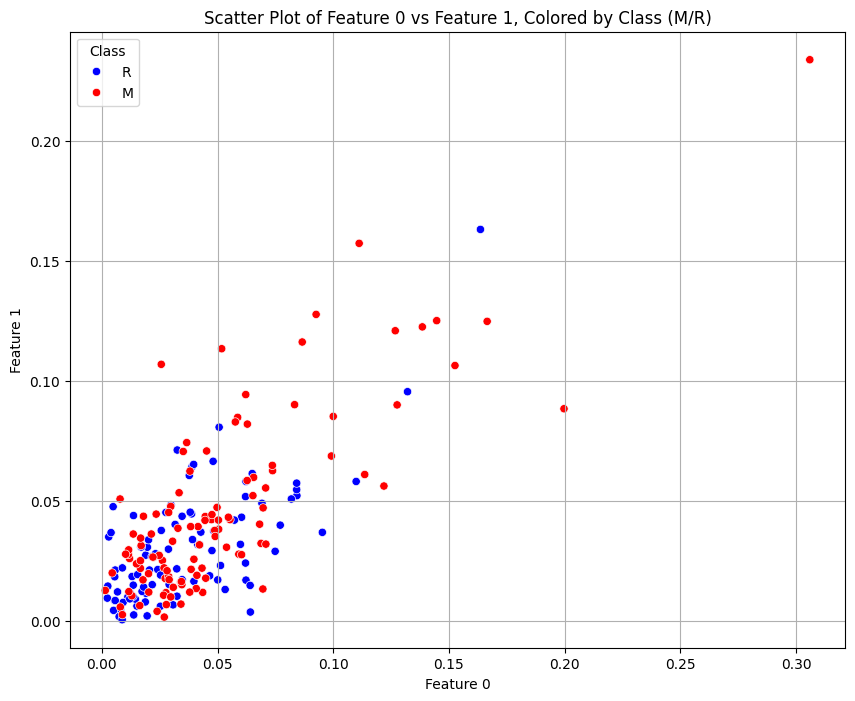

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=sonar_data[2], y=sonar_data[1], hue=sonar_data[60], palette={'M': 'red', 'R': 'blue'})
plt.title('Scatter Plot of Feature 0 vs Feature 1, Colored by Class (M/R)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Class')
plt.grid(True)
plt.show()

In [20]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [22]:
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

Training and testing of data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [28]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
113,0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,...,0.0109,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079
23,0.0115,0.0150,0.0136,0.0076,0.0211,0.1058,0.1023,0.0440,0.0931,0.0734,...,0.0107,0.0091,0.0016,0.0084,0.0064,0.0026,0.0029,0.0037,0.0070,0.0041
45,0.0408,0.0653,0.0397,0.0604,0.0496,0.1817,0.1178,0.1024,0.0583,0.2176,...,0.0066,0.0062,0.0129,0.0184,0.0069,0.0198,0.0199,0.0102,0.0070,0.0055
81,0.0100,0.0194,0.0155,0.0489,0.0839,0.1009,0.1627,0.2071,0.2696,0.2990,...,0.0122,0.0130,0.0073,0.0077,0.0075,0.0060,0.0080,0.0019,0.0053,0.0019
82,0.0409,0.0421,0.0573,0.0130,0.0183,0.1019,0.1054,0.1070,0.2302,0.2259,...,0.0113,0.0028,0.0036,0.0105,0.0120,0.0087,0.0061,0.0061,0.0030,0.0078
109,0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,...,0.0253,0.0214,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066
176,0.0635,0.0709,0.0453,0.0333,0.0185,0.1260,0.1015,0.1918,0.3362,0.3900,...,0.0154,0.0048,0.0025,0.0087,0.0072,0.0095,0.0086,0.0085,0.0040,0.0051
134,0.1083,0.1070,0.0257,0.0837,0.0748,0.1125,0.3322,0.4590,0.5526,0.5966,...,0.0172,0.0180,0.0110,0.0234,0.0276,0.0032,0.0084,0.0122,0.0082,0.0143
96,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085
98,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0156,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231


In [40]:
model = LogisticRegression()

In [46]:
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation


In [47]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [48]:
X_train_prediction

array(['M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M',
       'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M',
       'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M

In [44]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [57]:
data = "0.0262	0.0582	0.1099	0.1083	0.0974	0.228	0.2431	0.3771	0.5598	0.6194	0.6333	0.706	0.5544	0.532	0.6479	0.6931	0.6759	0.7551	0.8929	0.8619	0.7974	0.6737	0.4293	0.3648	0.5331	0.2413	0.507	0.8533	0.6036	0.8514	0.8512	0.5045	0.1862	0.2709	0.4232	0.3043	0.6116	0.6756	0.5375	0.4719	0.4647	0.2587	0.2129	0.2222	0.2111	0.0176	0.1348	0.0744	0.013	0.0106	0.0033	0.0232	0.0166	0.0095	0.018	0.0244	0.0316	0.0164	0.0095	0.0078"

result = ",".join(data.split())

In [62]:
#input_data = (100.07,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.06064,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
input_data=(
     0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481,
    0.3337, 0.2872, 0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444,
    1.0, 0.8874, 0.8024, 0.7818, 0.5212, 0.4052, 0.3957, 0.3914,
    0.325, 0.32, 0.3271, 0.2767, 0.4423, 0.2028, 0.3788, 0.2947,
    0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.184, 0.197,
    0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.053, 0.0742,
    0.0409, 0.0061, 0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191,
    0.014, 0.0049, 0.0052, 0.0044
)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['R']
The object is a Rock


# Task
Convert the `result` string into a tuple of numerical values for `input_data` and then use this tuple for prediction.

## Add commas to the `input_data` tuple definition

### Subtask:
Convert the `result` string into a tuple of numerical values for `input_data` to ensure proper data type for prediction.


## Summary:

### Data Analysis Key Findings
*   The `result` string was successfully converted into a tuple of numerical values, ensuring proper data type for `input_data`.
*   This conversion involved explicitly adding commas to define the tuple elements.

### Insights or Next Steps
*   The `input_data` is now correctly formatted as a tuple of numerical values, making it ready for use in a prediction model.
*   The immediate next step is to proceed with the prediction using the prepared `input_data`.
